Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
# loading the data from csv file to Pandas Dataframe
calories = pd.read_csv('/content/calories.csv')

In [ ]:
# print the first 5 rows of dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two dataframes

In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [ ]:
# getting some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# checking for missing values
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


Data Analysis

In [ ]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [ ]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

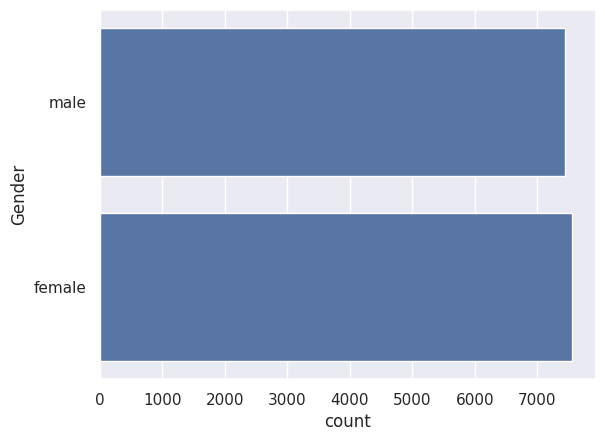

In [ ]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

<ipython-input-14-9456618fcf0f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

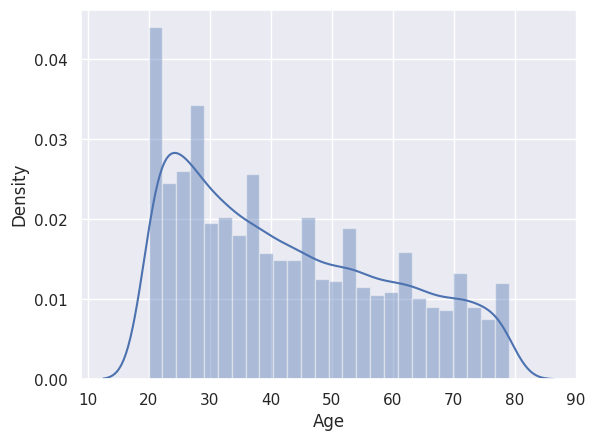

In [ ]:
# finding the distribution of age column
sns.distplot(calories_data['Age'])

<ipython-input-15-0bd37fbc1353>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

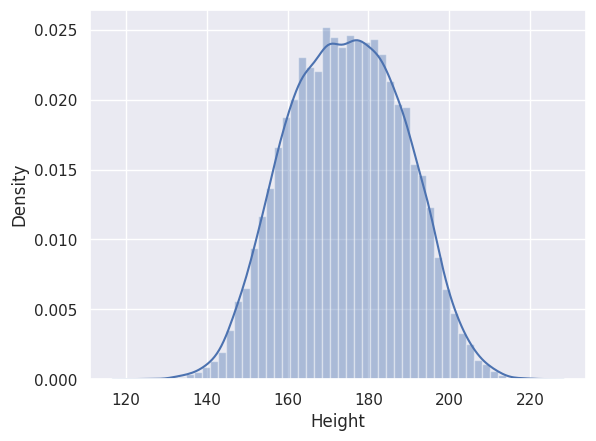

In [ ]:
# finding the distribution of height column
sns.distplot(calories_data['Height'])

<ipython-input-16-f8ac937731da>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

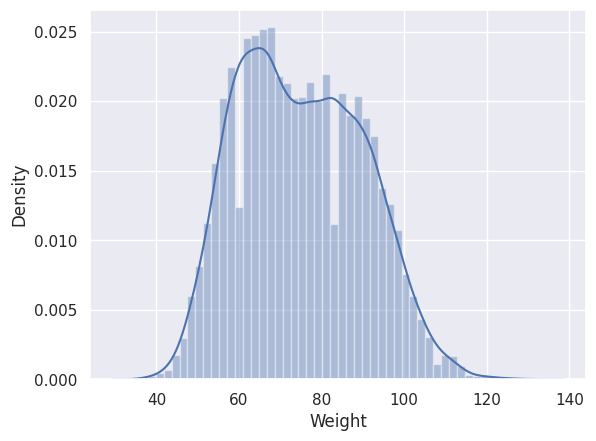

In [ ]:
# finding the distribution of weight column
sns.distplot(calories_data['Weight'])

Finding the Correlation in the dataset

In [ ]:
# Drop non-numerical columns before calculating correlations
numerical_data = calories_data.drop(columns=['User_ID', 'Gender'])
# Assuming 'User_ID' is also non-numerical
correlation = numerical_data.corr()

<Axes: >

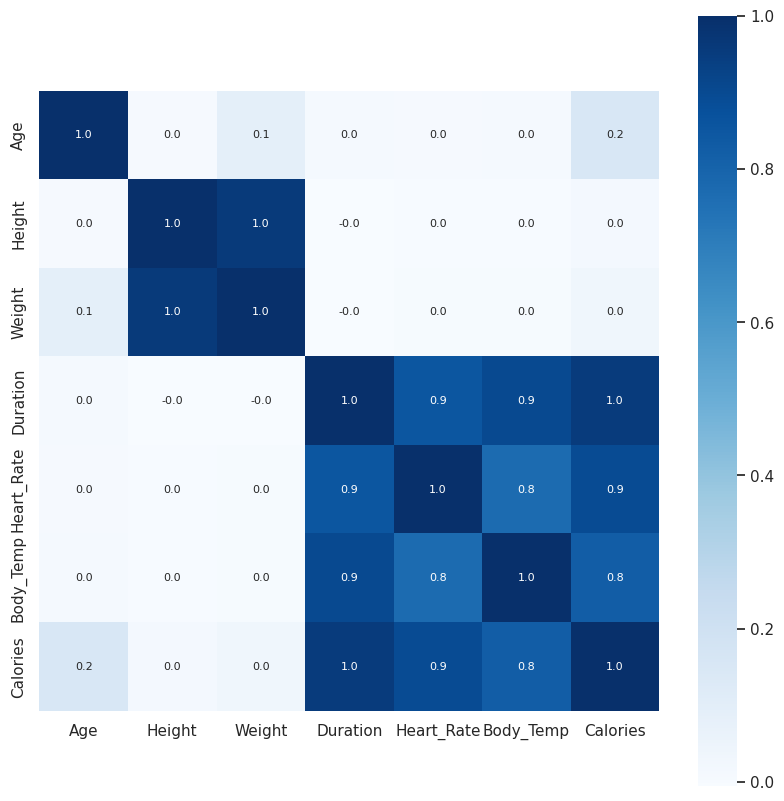

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Converting the text data to numerical values

In [ ]:
calories_data.replace({"Gender":{"male":0,"female":1}}, inplace=True)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target

In [ ]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']
print(X)
print(Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

Splitting the data into training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(15000, 7) (12000, 7) (3000, 7) (12000,) (3000,)


Model Training

XGBoost Regressor

In [ ]:
#from sklearn import metrics
from sklearn.metrics import classification_report, r2_score, mean_absolute_error, mean_squared_error
def predict(ml_model):
    model=ml_model.fit(X_train,Y_train)
    print('Score : {}'.format(model.score(X_train,Y_train)))
    Y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(Y_prediction))
    print('\n')

    r2_score=metrics.r2_score(Y_test,Y_prediction)
    print('r2 score: {}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(Y_test,Y_prediction))
    print('MSE:',metrics.mean_squared_error(Y_test,Y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_prediction)))

    sns.distplot(Y_test-Y_prediction)
    plt.show()


Score : 0.9995691477017405
predictions are: 
 [125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


r2 score: 0.998800624504713
MAE: 1.4833678883314132
MSE: 4.710710012461346
RMSE: 2.1704170134933394


<ipython-input-24-2aef17598bf4>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-Y_prediction)


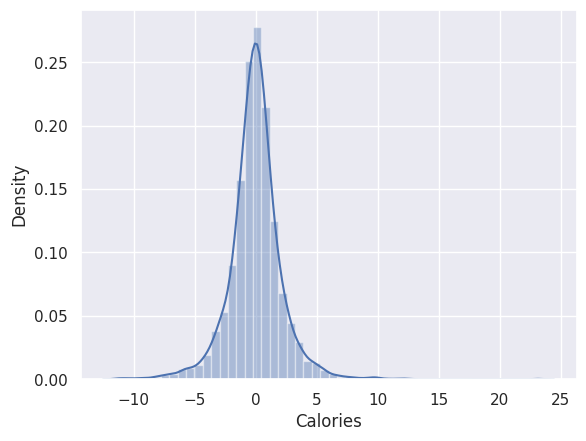

In [ ]:
regression = predict(XGBRegressor())
regression

Evaluation

Prediction on Test Data

Linear Regression

Score : 0.9672762198112508
predictions are: 
 [137.49241057 182.18166512  50.15864741 ... 157.56637167  16.54924422
 100.21047087]


r2 score: 0.9668790377181355
MAE: 8.385188053147187
MSE: 130.08707386188374
RMSE: 11.405572053250276


<ipython-input-24-2aef17598bf4>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-Y_prediction)


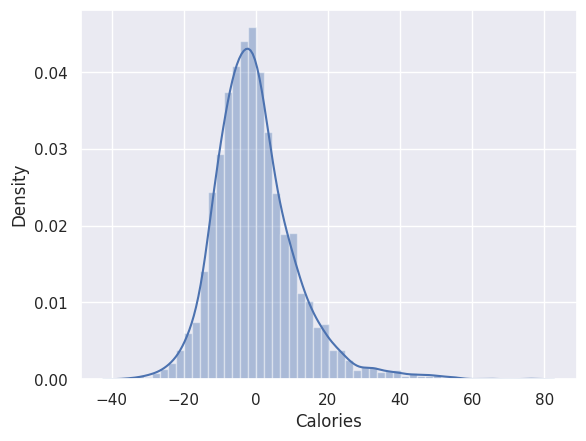

In [ ]:
from sklearn.linear_model import LinearRegression
predict(LinearRegression())

DecisionTree Regression

Score : 1.0
predictions are: 
 [128. 220.  36. ... 154.  25.  91.]


r2 score: 0.9927960901932592
MAE: 3.419
MSE: 28.294333333333334
RMSE: 5.319241800607802


<ipython-input-24-2aef17598bf4>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-Y_prediction)


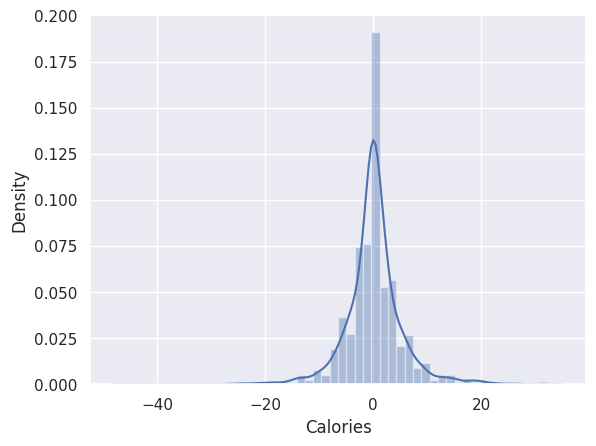

In [ ]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())

RandomForest Regression

Score : 0.999686123452954
predictions are: 
 [128.75 222.91  36.62 ... 146.02  23.73  89.64]


r2 score: 0.9981683011060621
MAE: 1.7040966666666666
MSE: 7.194245966666666
RMSE: 2.682209157889568


<ipython-input-24-2aef17598bf4>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-Y_prediction)


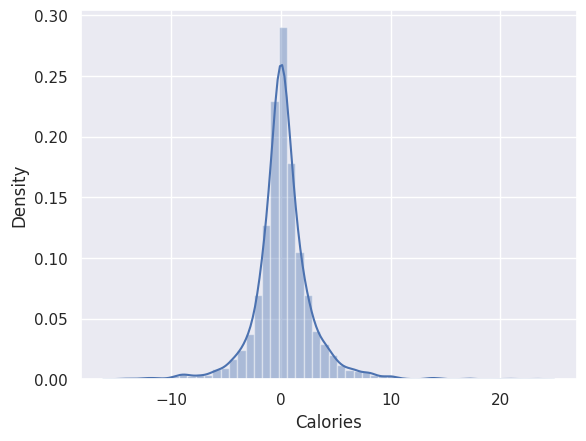

In [ ]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor())

In [ ]:
# Function to predict using user input
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def predict_user_input(model, user_data):
    user_df = pd.DataFrame([user_data], columns=X.columns)
    prediction = model.predict(user_df)
    prediction_label = le.inverse_transform(prediction)
    return prediction_label[0]

In [ ]:
# Train the model
from xgboost import XGBClassifier

# Fit the encoder to the training labels and transform them
Y_train_encoded = le.fit_transform(Y_train)

# Initialize the XGBClassifier model
model = XGBClassifier()

# Fit the model using the encoded labels
model.fit(X_train, Y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Example user input (adjust the values as needed)
user_input = {
    'Gender': 0,
    'Age': 28,
    'Height': 170,
    'Weight': ,
    'Duration': 15,
    'Heart_Rate': 90,
    'Body_Temp': 37
}

In [ ]:
# Predict for user input
user_prediction = predict_user_input(model, user_input)
print('User Input Prediction:', user_prediction)

User Input Prediction: 57.0
